<a href="https://colab.research.google.com/github/spshreya/21daysofML/blob/main/timeseriesprac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload()


Saving perrin-freres-monthly-champagne-.csv to perrin-freres-monthly-champagne- (2).csv


In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
import numpy as np
from pmdarima.arima import auto_arima

In [4]:
#!pip install statsmodels==0.12.2

In [5]:
import statsmodels
statsmodels.__version__

'0.12.2'

#Data Description
###The dataset is monthly sales of champagne from year 1964 to 1972.

In [6]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [7]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [9]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [10]:
df.columns=['months','sales']
df.head()

,months,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
#df.drop(106, axis=0, inplace=True)
df.dropna(axis=0, inplace=True)
df.tail()

,months,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
df['months']=pd.to_datetime(df['months'])

In [13]:
df.head()

,months,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [14]:
df.set_index('months', inplace=True)

In [15]:
df.head()

,sales
months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


##Plotting Data
to see components like seasonality, stationarity, ttrend, etc.

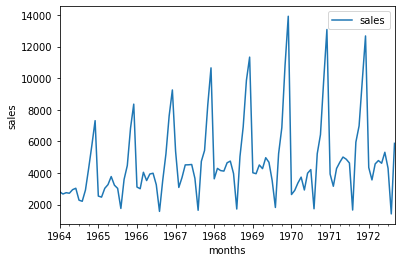

In [16]:
df.plot(ylabel="sales")

#Testing for stationarity using A D Fuller test

###h0: data is not stationary
###h1: data is stationary

In [17]:
test_result = adfuller(df['sales'])

#gives 5 values
#adf test stats, p-value, no of lags used, no of observation used

test_result

(-1.8335930563276188,
 0.363915771660247,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

In [18]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#Differencing 
###to remove seasonality

In [20]:
df['Seasonal First Difference']=df['sales']-df['sales'].shift(1)

In [21]:
df.head(20)

,sales,Seasonal First Difference
months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
1964-06-01,3036.0,90.0
1964-07-01,2282.0,-754.0
1964-08-01,2212.0,-70.0
1964-09-01,2922.0,710.0


In [22]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.189896448051
p-value : 2.519620447387081e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


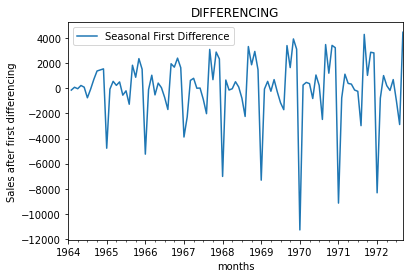

In [23]:
df['Seasonal First Difference'].plot(ylabel='Sales after first differencing', title='DIFFERENCING',legend=True)

#Auotcorrelation and Partial Autocorrealtaion

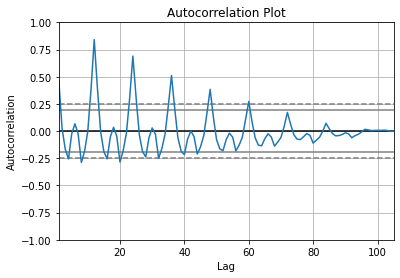

In [24]:
autocorrelation_plot(df['sales'])
plt.title('Autocorrelation Plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


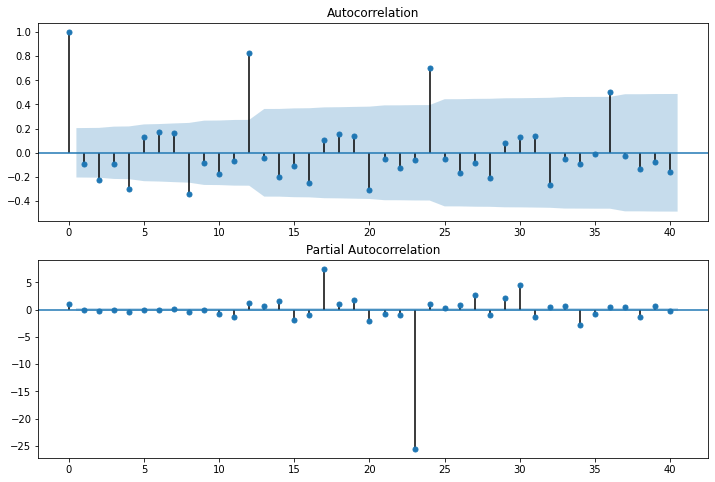

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [26]:
train = df['sales'][:90]
test =  df['sales'][90:]

#ARIMA
####for non seasonal data

In [27]:
statsmodels.__version__

'0.12.2'

In [28]:
#p=0/1, d=1 and q=0/1
modela = ARIMA(train, order=(0,1,1))
modela_fit = modela.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [29]:
modela_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   89
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -823.934
Method:                       css-mle   S.D. of innovations           2536.681
Date:                Tue, 21 Jun 2022   AIC                           1653.868
Time:                        13:12:12   BIC                           1661.334
Sample:                    02-01-1964   HQIC                          1656.877
                         - 06-01-1971                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.1355    227.913      0.102      0.919    -423.567     469.838
ma.L1.D.sales    -0.1541      0.177     -0.870      0.384      -0.501       0.193
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            6.4883           +0.0000j            6.4883            0.0000
-----------------------------------------------------------------------------
"""

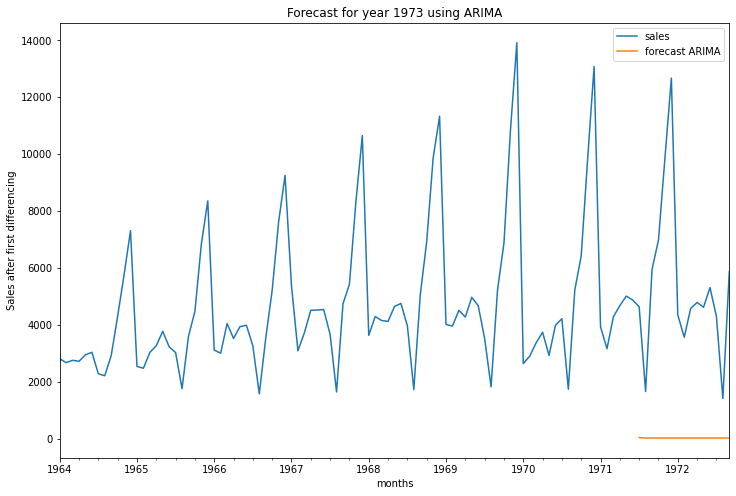

In [30]:
df['forecast ARIMA']= modela_fit.predict(start=90,end=105,dynamic=True)
df[['sales','forecast ARIMA']].plot(figsize=(12,8), ylabel='Sales after first differencing', title='Forecast for year 1973 using ARIMA')

In [31]:
arimaPred= modela_fit.predict(start=90,end=104,dynamic=True)
arimaPred

1971-07-01    38.497689
1971-08-01    23.135535
1971-09-01    23.135535
1971-10-01    23.135535
1971-11-01    23.135535
1971-12-01    23.135535
1972-01-01    23.135535
1972-02-01    23.135535
1972-03-01    23.135535
1972-04-01    23.135535
1972-05-01    23.135535
1972-06-01    23.135535
1972-07-01    23.135535
1972-08-01    23.135535
1972-09-01    23.135535
Freq: MS, dtype: float64

In [32]:
test

months
1971-07-01     4633.0
1971-08-01     1659.0
1971-09-01     5951.0
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
1972-01-01     4348.0
1972-02-01     3564.0
1972-03-01     4577.0
1972-04-01     4788.0
1972-05-01     4618.0
1972-06-01     5312.0
1972-07-01     4298.0
1972-08-01     1413.0
1972-09-01     5877.0
Name: sales, dtype: float64

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
mean_absolute_percentage_error(test, arimaPred)

99.39741081464106

In [35]:
df['forecast ARIMA']

months
1964-01-01          NaN
1964-02-01          NaN
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
                ...    
1972-05-01    23.135535
1972-06-01    23.135535
1972-07-01    23.135535
1972-08-01    23.135535
1972-09-01    23.135535
Name: forecast ARIMA, Length: 105, dtype: float64

#AUTO-ARIMA

In [36]:
stepwise_model1 = auto_arima(df['sales'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model1.aic())

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.303 seconds
1935.7495880619226


In [37]:
stepwise_model1.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [38]:
future_forecast = stepwise_model1.predict(n_periods=15)
future_forecast 

array([4874., 4874., 4874., 4874., 4874., 4874., 4874., 4874., 4874.,
       4874., 4874., 4874., 4874., 4874., 4874.])

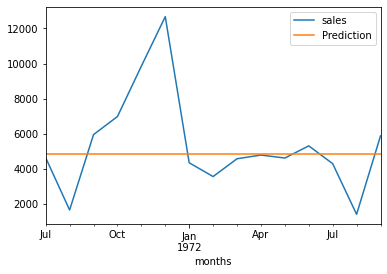

In [39]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [40]:
test,future_forecast

(months
 1971-07-01     4633.0
 1971-08-01     1659.0
 1971-09-01     5951.0
 1971-10-01     6981.0
 1971-11-01     9851.0
 1971-12-01    12670.0
 1972-01-01     4348.0
 1972-02-01     3564.0
 1972-03-01     4577.0
 1972-04-01     4788.0
 1972-05-01     4618.0
 1972-06-01     5312.0
 1972-07-01     4298.0
 1972-08-01     1413.0
 1972-09-01     5877.0
 Name: sales, dtype: float64,             Prediction
 months                
 1971-07-01      4874.0
 1971-08-01      4874.0
 1971-09-01      4874.0
 1971-10-01      4874.0
 1971-11-01      4874.0
 1971-12-01      4874.0
 1972-01-01      4874.0
 1972-02-01      4874.0
 1972-03-01      4874.0
 1972-04-01      4874.0
 1972-05-01      4874.0
 1972-06-01      4874.0
 1972-07-01      4874.0
 1972-08-01      4874.0
 1972-09-01      4874.0)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
r2_score(test, future_forecast)

-0.03241905349064855

In [43]:
np.sqrt(mean_squared_error(test, future_forecast))

2795.2804987454597

In [44]:
mean_absolute_percentage_error(test, future_forecast)

47.04419984812205

#SARIMAX

##In sample forecasting using SARIMAX

In [45]:
stepwise_model = auto_arima(df['sales'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1486.124, Time=0.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.48 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.23 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1486.804, Time=0.90 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1486.780, Time=3.39 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=1.66 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=3.78 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=7.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=1.02 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1487.125, Time=3.50 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1487.101, Time=4.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.48 sec
 ARIMA(0,1,2)(1,1,0)[12]

In [46]:
model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,0,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


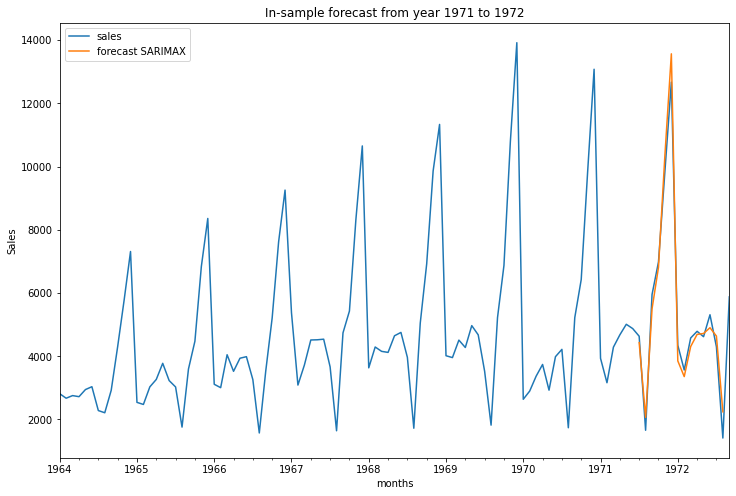

In [47]:
df['forecast SARIMAX']=results.predict(start=90,end=103,dynamic=True)
df[['sales','forecast SARIMAX']].plot(figsize=(12,8),ylabel= 'Sales' ,title='In-sample forecast from year 1971 to 1972')

In [48]:
sarimaPred = results.predict(start=90,end=104,dynamic=True)

In [49]:
r2_score(test, sarimaPred)

0.9745492268712359

In [50]:
mean_absolute_percentage_error(test, sarimaPred)

10.401160476707933

##Out sample forecasting using SARIMAX

In [51]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,96)]

In [52]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dates_df.tail()

,sales,Seasonal First Difference,forecast ARIMA,forecast SARIMAX
1980-04-01,NaN,NaN,NaN,NaN
1980-05-01,NaN,NaN,NaN,NaN
1980-06-01,NaN,NaN,NaN,NaN
1980-07-01,NaN,NaN,NaN,NaN
1980-08-01,NaN,NaN,NaN,NaN


In [53]:
future_df = pd.concat([df, future_dates_df])
future_df.tail()

,sales,Seasonal First Difference,forecast ARIMA,forecast SARIMAX
1980-04-01,NaN,NaN,NaN,NaN
1980-05-01,NaN,NaN,NaN,NaN
1980-06-01,NaN,NaN,NaN,NaN
1980-07-01,NaN,NaN,NaN,NaN
1980-08-01,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


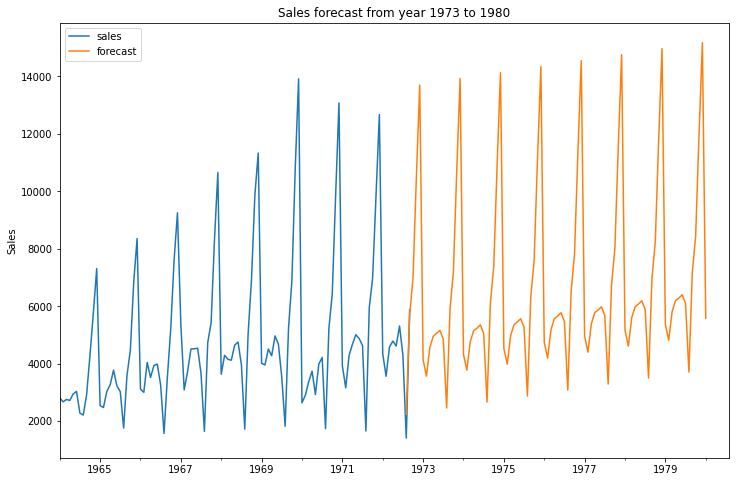

In [54]:
future_df['forecast']=results.predict(start=103,end=192,dynamic=True)
future_df[['sales','forecast']].plot(figsize=(12,8),ylabel='Sales',title='Sales forecast from year 1973 to 1980')